# Description of Study
We looked at cluster 3, 1 in the last case study. Lets try and see how cluster 0 is different. As a reminder, here is the performance discrepency.

![caption](k_4_performance_graphs.png)

### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'
ROOT = os.path.dirname(os.getcwd())
teams = pd.read_pickle('C:/Users/musta/Desktop/Fall 2020/Thesis/thesis_soccer/processed_data/teams.pkl.gz')

<AxesSubplot:title={'center':'Hierarchical Clustering Centroids'}>

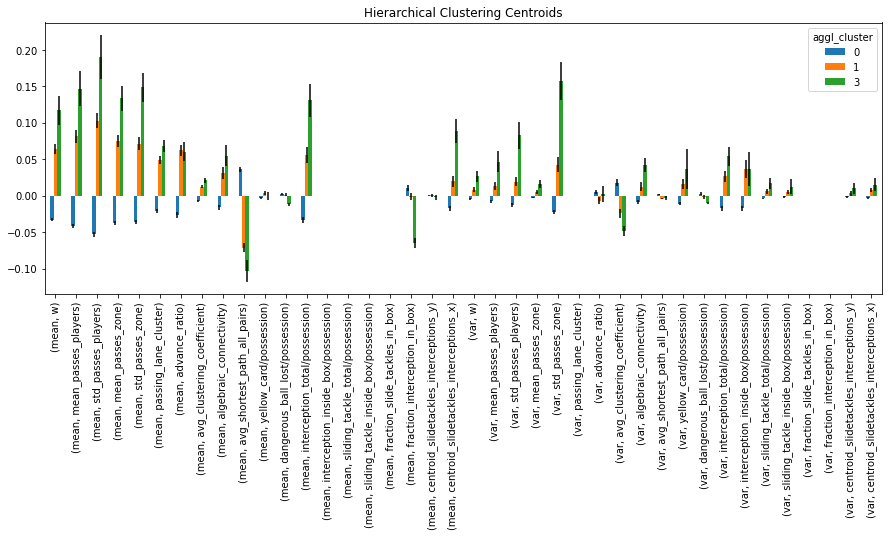

In [15]:
df_assignments = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'k_4_assignments.pkl.gz'))
scaled_data = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'k_4_data.pkl.gz'))
scaled_data = scaled_data.loc[scaled_data['aggl_cluster'].isin([0, 1, 3])]

errors = scaled_data.groupby('aggl_cluster').apply(pd.DataFrame.sem).iloc[:, :-1]
scaled_data.groupby('aggl_cluster').mean().T.plot(yerr=errors.values, kind='bar', figsize=(15,5), title='Hierarchical Clustering Centroids')

## How is cluster 0 different from 1,3?

Cluster 0 is directionally opposite to the other two, with lower magnitudes experssing features. Therefore we observe low passing volume in across players, zones, 



The passing metrics are all low, and the algebraic connectivity, advance ratio, and passing lane cluster values are also lower


In [47]:
df_assignments.loc[df_assignments.index==0].sort_values(by='rank')

,name,area.name,avg_pass_per_game,avg_shots_per_game,end_of_season_pts,goals_scored,goals_conceded,GD,rank,pezzali,conversion_rate
cluster,,,,,,,,,,,
0,Schalke 04,Germany,400.382353,10.382353,1.823529,1.558824,1.088235,16,2.0,0.911006,0.114577
0,Rennes,France,401.736842,10.368421,1.526316,1.315789,1.157895,6,5.0,0.884116,0.120129
0,Burnley,England,335.921053,9.052632,1.421053,0.947368,1.026316,-3,7.0,1.494380,0.120216
0,Stuttgart,Germany,411.352941,9.382353,1.500000,1.058824,1.058824,0,7.0,1.142902,0.119853
0,Getafe,Spain,281.368421,8.342105,1.394737,1.105263,0.868421,9,8.0,0.805397,0.102338
0,Eintracht Frankfurt,Germany,391.529412,10.205882,1.441176,1.323529,1.323529,0,8.0,1.087738,0.128075
0,Everton,England,369.578947,8.421053,1.263158,1.157895,1.526316,-14,8.0,0.698805,0.125649
0,Leicester City,England,378.342105,9.868421,1.236842,1.473684,1.578947,-4,9.0,1.144271,0.135266
0,Montpellier,France,397.684211,11.210526,1.342105,0.947368,0.868421,3,9.0,0.669874,0.087369


**Schalke looks to be an anomally**

In [28]:
teams.loc[teams['name']=='Schalke 04']

,city,name,wyId,officialName,type,area.name,area.id,area.alpha3code,area.alpha2code
33,Gelsenkirchen,Schalke 04,2449,FC Schalke 04,club,Germany,276,DEU,DE


<AxesSubplot:>

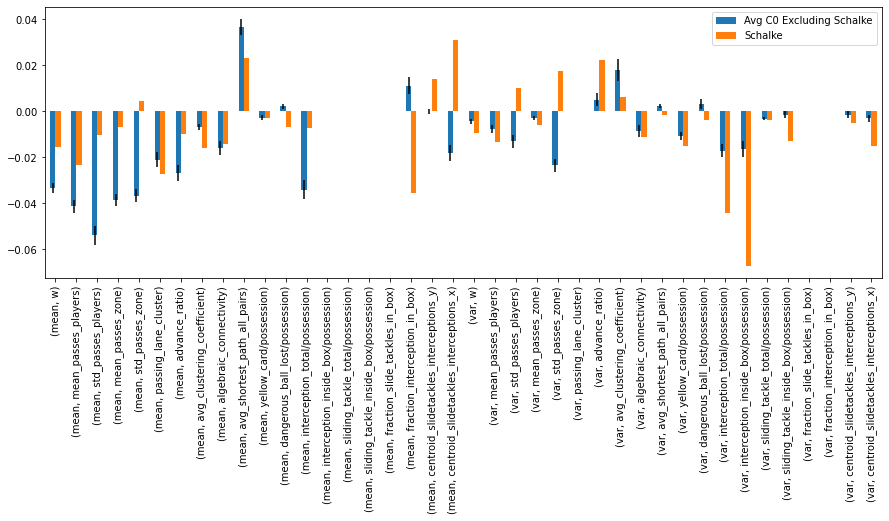

In [44]:
schalke = scaled_data.loc[scaled_data.index==2449].iloc[:, :-1]

others = scaled_data.loc[(scaled_data.index!=2449) & (scaled_data['aggl_cluster']==0)].iloc[:, :-1]
df = pd.concat([others.mean(), schalke.iloc[0]], axis=1, keys=['Avg C0 Excluding Schalke', 'Schalke'])

errors = others.sem().to_frame('Avg C0 Excluding Schalke')
errors['Schalke'] = 0

df.plot(kind='bar', figsize=(15,5), yerr=errors.values.T)

Schalke's anomalous behaviour can be explained by the fact that its passing metrics from the graph analyses are not as low as the other is C0. Further, their fraction of intersections and slide tackles is significantly below the mean, and the X centorid of slide tackles and intersections is signififcantly above the mean, unlike the C0 average.  

This indicates they play higher up the pitch compared to the rest of the teams in C0. 